

---




#`The demonstrates how to use the Python SDK for the Gemini API, which gives you access to Google's Gemini large language models. `


---


1. Set up your development environment and API access to use Gemini.
2. Generate text responses from text inputs.
3. Generate text responses from multimodal inputs (text and images).
4. Use Gemini for multi-turn conversations (chat).
5. Use embeddings for large language models.

##INSTALL THE PYTHON SDK




---



The Python SDK for the Gemini API, is contained in the `google-generativeai package`. Install the dependency using pip:



---



Responsible for calling various Gemini Models.

In [2]:
!pip install -q -U google_generativeai

In [3]:
import pathlib
import textwrap
import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown

def to_markdown(text):
  text = text.replace('.','  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))



---


 ## In Order to Call `API key` We need to set `API KEY`.

---




In [4]:
from google.colab import  userdata




---




Once you have the `API` key, pass it to the SDK. You can do this in two ways:


 Put the key in the `GOOGLE_API_KEY` environment variable (the SDK will automatically pick it up from there)

 1) Pass the key to genai.configure(api_key=...)

 2) Use os.getenv('GOOGLE_API_KEY') to fetch an environment variable



---





`SETUP THE API KEY `

In [5]:
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')

genai.configure(api_key=GOOGLE_API_KEY)

## EXPLORING THE MODEL OF GEMINI MODEL


In [6]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro-002
models/gemini-1.5-pro
models/gemini-1.5-flash-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash-001-tuning
models/gemini-1.5-flash
models/gemini-1.5-flash-002
models/gemini-1.5-flash-8b
models/gemini-1.5-flash-8b-001
models/gemini-1.5-flash-8b-latest
models/gemini-1.5-flash-8b-exp-0827
models/gemini-1.5-flash-8b-exp-0924
models/gemini-2.5-pro-exp-03-25
models/gemini-2.0-flash-exp
models/gemini-2.0-flash
models/gemini-2.0-flash-001
models/gemini-2.0-flash-exp-image-generation
models/gemini-2.0-flash-lite-001
models/gemini-2.0-flash-lite
models/gemini-2.0-flash-lite-preview-02-05
models/gemini-2.0-flash-lite-preview
models/gemini-2.0-pro-exp
models/gemini-2.0-pro-exp-02-05
models/gemini-exp-1206
models/gemini-2.0-flash-thinking-exp-01-21
models/gemini-2.0-flash-thinking-exp
models/gemini-2.0-flash-thinking-exp-1219
models/learnlm-1.5-pro-e

### gemini-pro: optimized for text-only prompts.

### gemini-pro-vision: optimized for text-and-images prompts.

#CALLING THE MODEL

In [7]:
model = genai.GenerativeModel('models/gemini-1.5-pro')

In [8]:
model

genai.GenerativeModel(
    model_name='models/gemini-1.5-pro',
    generation_config={},
    safety_settings={},
    tools=None,
    system_instruction=None,
    cached_content=None
)

In [9]:
%time

response = model.generate_content("Who is Goku?")

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.34 µs


In [10]:
response.text

"Goku, also known as Kakarot, is the main protagonist of the *Dragon Ball* manga series created by Akira Toriyama.  He's a Saiyan warrior who was sent to Earth as a baby to destroy it.  However, a head injury as a child caused him to lose his violent Saiyan nature, and he grew up with a pure heart and an insatiable love for fighting and pushing his limits.\n\nHere's a summary of key aspects of Goku:\n\n* **Saiyan Heritage:**  He's incredibly strong and possesses unique abilities like Super Saiyan transformations, which drastically increase his power.\n* **Martial Artist:** Goku is a dedicated martial artist who constantly seeks stronger opponents to test his skills and become more powerful.\n* **Naive and Pure-Hearted:** Despite his fighting prowess, Goku is often depicted as somewhat naive and possesses a childlike innocence and love for his friends and family.\n* **Protector of Earth:**  He's Earth's greatest defender, repeatedly saving the planet from various powerful threats.\n* **

In [11]:
to_markdown(response.text)

> Goku, also known as Kakarot, is the main protagonist of the *Dragon Ball* manga series created by Akira Toriyama  *  He's a Saiyan warrior who was sent to Earth as a baby to destroy it  *  However, a head injury as a child caused him to lose his violent Saiyan nature, and he grew up with a pure heart and an insatiable love for fighting and pushing his limits  *
> 
> Here's a summary of key aspects of Goku:
> 
> * **Saiyan Heritage:**  He's incredibly strong and possesses unique abilities like Super Saiyan transformations, which drastically increase his power  *
> * **Martial Artist:** Goku is a dedicated martial artist who constantly seeks stronger opponents to test his skills and become more powerful  *
> * **Naive and Pure-Hearted:** Despite his fighting prowess, Goku is often depicted as somewhat naive and possesses a childlike innocence and love for his friends and family  *
> * **Protector of Earth:**  He's Earth's greatest defender, repeatedly saving the planet from various powerful threats  *
> * **Driven by Self-Improvement:** Goku's primary motivation is to become the strongest he can be  * He relentlessly trains and pushes himself beyond his limits  *
> 
> Goku's journey throughout the *Dragon Ball* series sees him grow from a young boy to a legendary warrior, facing countless enemies and constantly evolving his abilities  * He's become a cultural icon and one of the most recognizable anime characters worldwide  *


In [12]:
response.prompt_feedback

In [13]:
%time

response = model.generate_content("Who is Goku?" , stream = True )

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.48 µs




---


`DISPLAYING THE TEXT CHUNK BY CHUNK`

---






### PARTS BY PARTS ALL RESPONSE ARE VISIBLE NOW.

In [14]:
for chunk in response :
  print (chunk.text)
  print("_"*80)

Goku
________________________________________________________________________________
, also known as Kakarot, is the main protagonist of the *Dragon Ball*
________________________________________________________________________________
 manga series created by Akira Toriyama, and its subsequent anime adaptations.  He
________________________________________________________________________________
's a powerful Saiyan warrior who was sent to Earth as a baby to destroy it. However, a head injury as a child caused him to lose his destructive
________________________________________________________________________________
 Saiyan nature, and he grew up with a pure heart and an insatiable love for fighting and pushing his limits.

Here are some key characteristics of Goku:

* **
________________________________________________________________________________
Saiyan Heritage:**  He possesses superhuman strength, speed, and durability, as well as the ability to transform into increasingly po

 ### `GENERATE TEXT FROM IMAGE AND TEXT INPUTS `



Gemini provides a multimodal model(gemini-pro-vision) that accepts both text and images and inputs.


The Generative Model.generate_content API is designed to handle multimodal prompts and returns a text output

In [15]:
!curl -o image.jpg https://the7eagles.com/wp-content/uploads/2024/05/What-is-an-Image-URL.webp

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 82982  100 82982    0     0   247k      0 --:--:-- --:--:-- --:--:--  247k


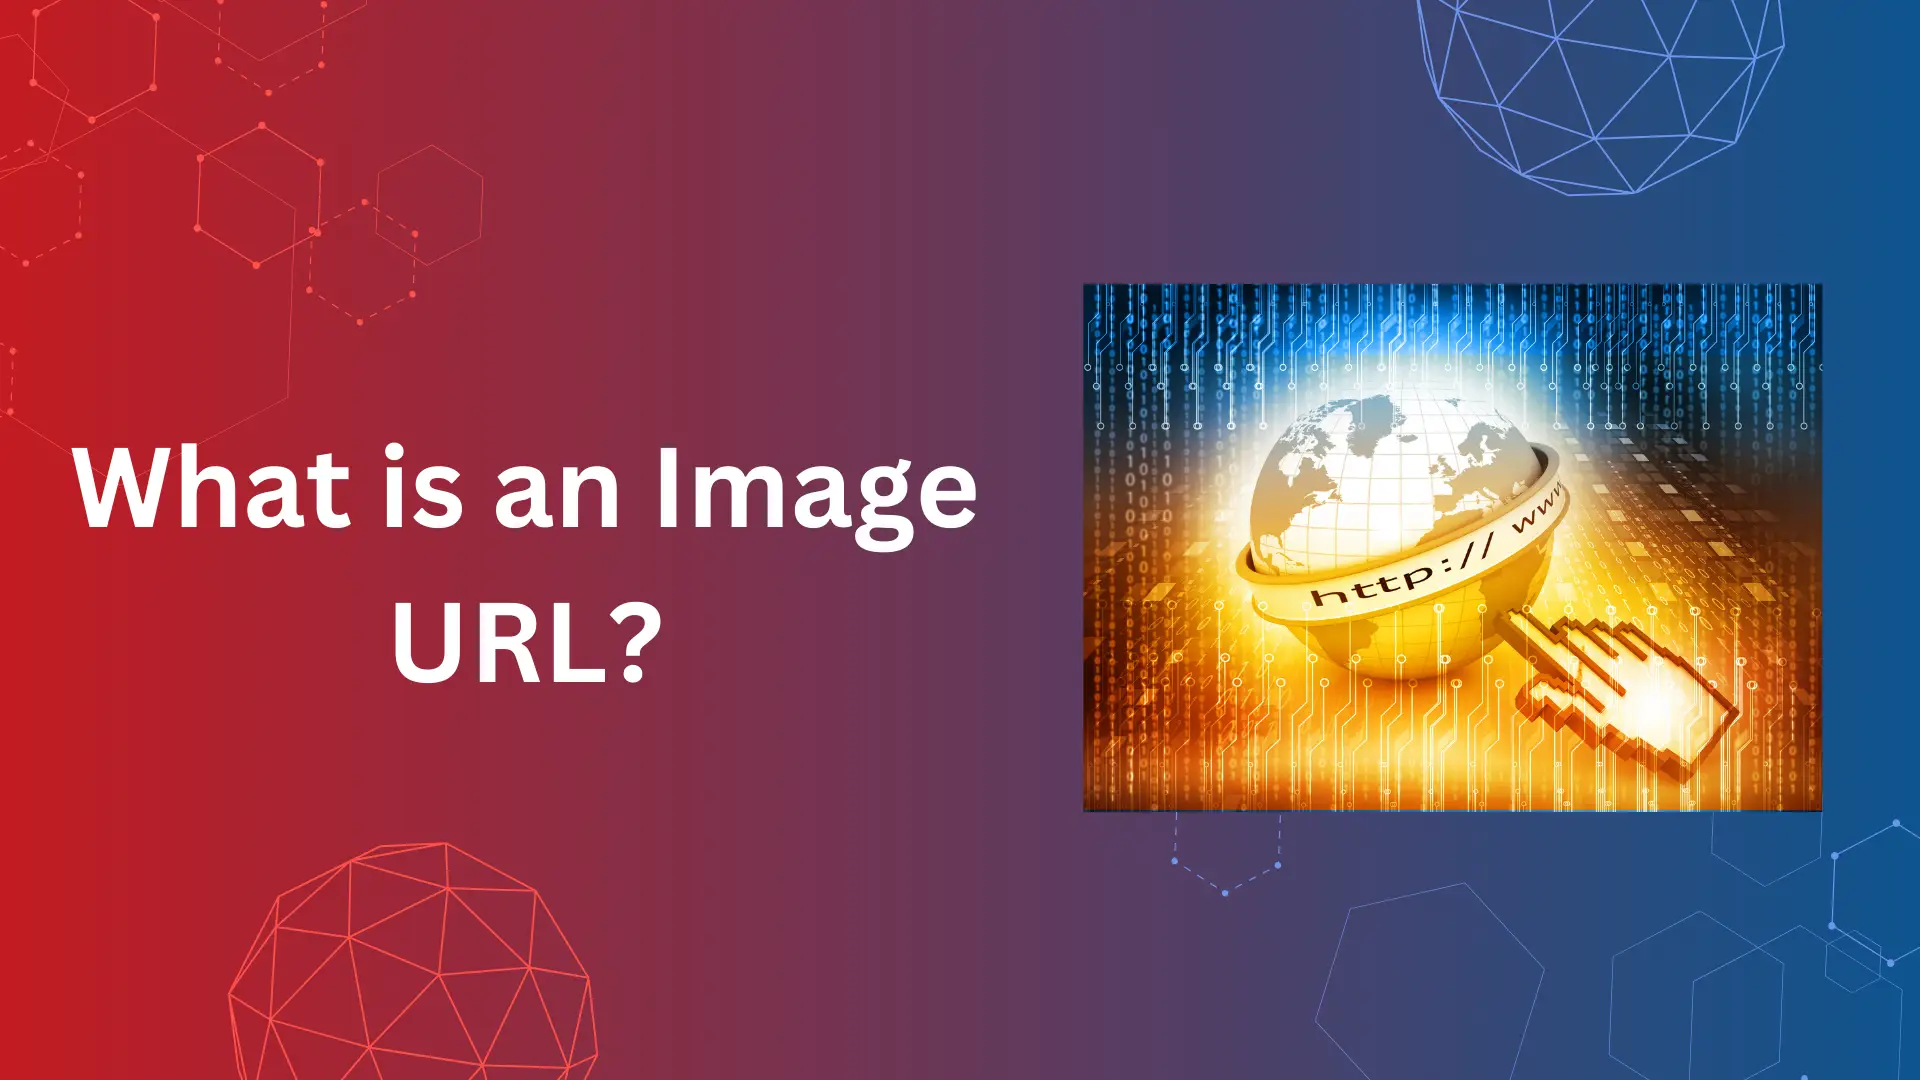

In [16]:
import PIL.Image

img = PIL.Image.open("image.jpg")
img

In [17]:
model = genai.GenerativeModel('gemini-1.5-flash')

In [18]:
response = model.generate_content(img)

to_markdown(response.text)

> An image URL is a Uniform Resource Locator (URL) that points to an image file on the internet  *  It's the web address you use to access and display an image in a web browser or other application  *  Just like any other URL, it tells the computer where to find the specific image file  *


In [19]:
response = model.generate_content(["write a short, engaging blog post based on this picture ", img ], stream = True)

response.resolve()

In [20]:
to_markdown(response.text)

> Here's a short blog post based on the provided image:
> 
> ## Decoding the Mystery: What's an Image URL?
> 
> Ever wondered how your favorite online photos magically appear on your screen?  It's all thanks to something called an **image URL**!  Think of it like a secret address pointing directly to a picture file on the internet  *
> 
> Just like a house has a street address, every image online has a unique URL  *  This URL is a string of characters (like you see in the image above – often starting with "http://") that tells your browser exactly where to find the image file and display it  *
> 
> So, the next time you see a captivating image online, remember that hidden behind it is a simple but powerful URL – the digital key that unlocks a world of visual wonders!


In [1]:
! apt-get install git

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.12).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/https:/github.com/SiddhantUke/EXPLORING-GEMINI-MODELS-.git/.git/


In [23]:
!git clone https://github.com/SiddhantUke/EXPLORING-GEMINI-MODELS-.git

fatal: destination path 'EXPLORING-GEMINI-MODELS-' already exists and is not an empty directory.
